**Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from google.colab import files 

**Import the CSV file or use read_html to extract data**

In [5]:
files.upload()

Saving Vehicles.csv to Vehicles.csv


{'Vehicles.csv': b'Automobile ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Weight Class ID,Category ID,Model,Model Year,City Range,Highway Range,City Fuel Economy,City Fuel Economy Units,Highway Fuel Economy,Highway Fuel Economy Units,City Gas Fuel Economy,Highway Gas Fuel Economy,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Battery Type,Battery Voltage Amps,110v Charge Time,220v Charge Time,Warranty Info,Ordering Info,Description,Comments,Manufacturer,Manufacturer URL,Fuel Code,Fuel,Category,Fuel Configuration Name\n11636,41,1,211,"",27,i3 BEV,2017,"","",137.0,Mpge,111.0,Mpge,"","",Auto,SI,125 kW,"",125 kW electric motor - 60 Amp-hour battery,"","","","","","","","",BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated\n11637,41,1,211,"",27,i3 BEV,2017,"","",129.0,Mpge,106.0,Mpge,"","",Auto,SI,125 kW ,"",125 kW electric motor - 94 Amp-hour battery,"","","","","","","","",BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated\n11638,41,1,215,"

**Show head an tail of Dataframe**

In [28]:
df=pd.read_csv('Vehicles.csv')
print(df.shape)
df.head()

(167, 35)


,Automobile ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Weight Class ID,Category ID,Model,Model Year,City Range,Highway Range,City Fuel Economy,City Fuel Economy Units,Highway Fuel Economy,Highway Fuel Economy Units,City Gas Fuel Economy,Highway Gas Fuel Economy,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Battery Type,Battery Voltage Amps,110v Charge Time,220v Charge Time,Warranty Info,Ordering Info,Description,Comments,Manufacturer,Manufacturer URL,Fuel Code,Fuel,Category,Fuel Configuration Name
0,11636,41,1,211,NaN,27,i3 BEV,2017,NaN,NaN,137.0,Mpge,111.0,Mpge,NaN,NaN,Auto,SI,125 kW,NaN,125 kW electric motor - 60 Amp-hour battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated
1,11637,41,1,211,NaN,27,i3 BEV,2017,NaN,NaN,129.0,Mpge,106.0,Mpge,NaN,NaN,Auto,SI,125 kW,NaN,125 kW electric motor - 94 Amp-hour battery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMW,www.bmwusa.com,ELEC,Electric,Sedan/Wagon,Dedicated
2,11638,41,1,215,NaN,27,Bolt,2017,NaN,NaN,128.0,Mpge,110.0,Mpge,NaN,NaN,Auto,SI,150 kW,NaN,150 kW electric motor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chevrolet,http://www.chevrolet.com,ELEC,Electric,Sedan/Wagon,Dedicated
3,11639,41,1,379,NaN,27,500e,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto,SI,82 kW,NaN,82 kW electric motor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiat,http://www.fiatusa.com/,ELEC,Electric,Sedan/Wagon,Dedicated
4,11640,41,1,351,NaN,27,Ioniq,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto,SI,NaN,NaN,NA/88 kW/28 kW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai,http://www.hyundaiusa.com/,ELEC,Electric,Sedan/Wagon,Dedicated


In [26]:
df=pd.read_csv('Vehicles.csv')
print(df.shape)
df.tail()

(167, 35)


,Automobile ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Weight Class ID,Category ID,Model,Model Year,City Range,Highway Range,City Fuel Economy,City Fuel Economy Units,Highway Fuel Economy,Highway Fuel Economy Units,City Gas Fuel Economy,Highway Gas Fuel Economy,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Battery Type,Battery Voltage Amps,110v Charge Time,220v Charge Time,Warranty Info,Ordering Info,Description,Comments,Manufacturer,Manufacturer URL,Fuel Code,Fuel,Category,Fuel Configuration Name
162,10664,ETrans,Trans Tech,NaN,52.0,NaN,NaN,[],Electric,School Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,10848,E-Gen,Workhorse Custom Chassis,NaN,NaN,NaN,NaN,[],Electric,Vocational/Cab Chassis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,10871,250/350,Zenith Motors,NaN,NaN,NaN,NaN,[],Electric,Van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,10870,Shuttle Van,Zenith Motors,NaN,NaN,NaN,NaN,[],Electric,Van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,10401,ZeroTruck,ZeroTruck,NaN,NaN,NaN,NaN,[],Electric,Vocational/Cab Chassis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Presents the different fuel economies and how many counts there are in that range**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


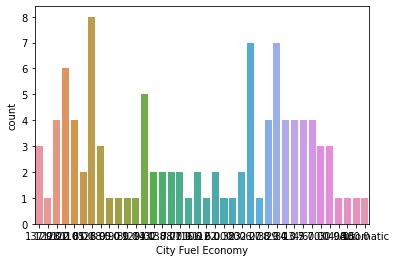

In [39]:
sns.countplot(df['City Fuel Economy'])

**Number of cars produced correlated to the City Fuel & Highway Fuel economy**

Text(0, 0.5, 'Total Count of Cars')

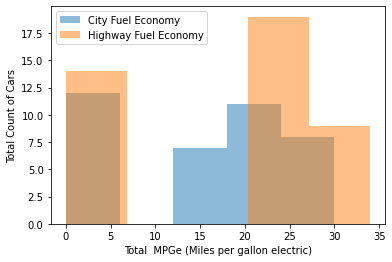

In [61]:
a=df['City Gas Fuel Economy']
b=df['Highway Gas Fuel Economy']
plt.hist(a,bins=5,label='City Fuel Economy',alpha=0.5)
plt.hist(b,bins=5,label='Highway Fuel Economy',alpha=0.5)
plt.legend(loc='best')
plt.title('')
plt.xlabel('Total  MPGe (Miles per gallon electric)')
plt.ylabel('Total Count of Cars')

**Presents the types of batteries and the count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


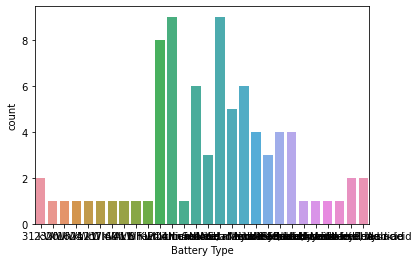

In [47]:
sns.countplot(df['Battery Type']) 


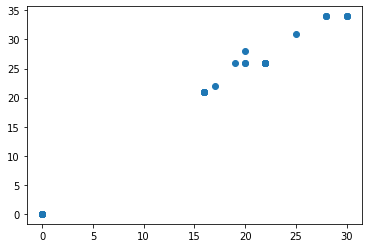

In [68]:
plt.scatter(df['City Gas Fuel Economy'],df['Highway Gas Fuel Economy'], cmap='viridis')

**Show whether or not there are missing data (which there is, since there are a total of 167 data points and in some there is only 94 data points)**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Automobile ID               167 non-null    int64  
 1   Fuel ID                     167 non-null    object 
 2   Fuel Configuration ID       167 non-null    object 
 3   Manufacturer ID             145 non-null    object 
 4   Weight Class ID             13 non-null     float64
 5   Category ID                 138 non-null    object 
 6   Model                       133 non-null    object 
 7   Model Year                  167 non-null    object 
 8   City Range                  68 non-null     object 
 9   Highway Range               52 non-null     object 
 10  City Fuel Economy           103 non-null    object 
 11  City Fuel Economy Units     115 non-null    object 
 12  Highway Fuel Economy        94 non-null     float64
 13  Highway Fuel Economy Units  115 non

**Showing if there are any duplicate rows: there are none since the output is an empty datafram**

In [72]:
duplicateRows = df[df.duplicated()]
print("Duplicate Rows on all columns are :")
print(duplicateRows)

Duplicate Rows on all columns are :
Empty DataFrame
Columns: [Automobile ID, Fuel ID, Fuel Configuration ID, Manufacturer ID, Weight Class ID, Category ID, Model, Model Year, City Range, Highway Range, City Fuel Economy, City Fuel Economy Units, Highway Fuel Economy, Highway Fuel Economy Units, City Gas Fuel Economy, Highway Gas Fuel Economy, Transmission Type, Engine Type, Engine Size, Engine Cylinder Count, Engine Description, Battery Type, Battery Voltage Amps, 110v Charge Time, 220v Charge Time, Warranty Info, Ordering Info, Description, Comments, Manufacturer, Manufacturer URL, Fuel Code, Fuel, Category, Fuel Configuration Name]
Index: []


**Checking for outliers in most popular columns**

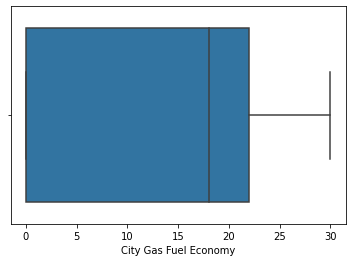

In [80]:
sns.boxplot(x=df['City Gas Fuel Economy'])

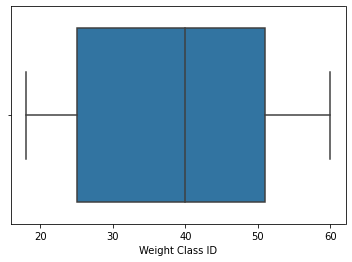

In [83]:
sns.boxplot(x=df['Weight Class ID'])

**List the variables you will be dummy coding**
-engine cyclinder count
-charge time for both 110 and 220v
-battery type 


** 1) I want to clean up this dataset so that I do not have 20 columns to deal with. I will likely remove all columns that are descriptions and contain unessacry data such as warrant ID. I will also be working on reasiing data for the future. 2) I will be analyzing the fuel economy of different make of cars in the future. Then with specific leading brands I will be comnparing fuel economy, charging time, battery type, and weight class (SUV or sedan)